In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
df=pd.read_csv('/content/sample_data/preprocessed_earthquake_data.csv')
drop_columns=['Type','Magnitude Type','Status','Source','Year','Day']
X=df.drop(columns=drop_columns+['Status_Reviewed'])
y=df['Status_Reviewed']
#Load the data and preprocessing

In [ ]:
noise=np.random.normal(0,0.1,X.shape)
X_noisy= X + noise

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_noisy,y,test_size=0.2,random_state=42)

In [ ]:
#logistic regression
logreg=LogisticRegression(C=0.5,max_iter=200,solver='saga',penalty='l2',random_state=42)
logreg.fit(X_train,y_train)

LogisticRegression(C=0.5, max_iter=200, random_state=42, solver='saga')

In [ ]:
#desision tree
dtree=DecisionTreeClassifier(max_depth=5,min_samples_split=10,min_samples_leaf=5,random_state=42)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [ ]:
y_pred_log=logreg.predict(X_test)
y_pred_dt=dtree.predict(X_test)
#model prediction

In [ ]:
def print_classification_metrics(y_true,y_pred,model_name):
  print(f"--- {model_name} Metrics ---")
  print("Accuracy:",accuracy_score(y_true,y_pred))
  print("F1 Score:",f1_score(y_true,y_pred,average='weighted'))
  print("Classification Report:\n",classification_report(y_true,y_pred))

In [ ]:
print_classification_metrics(y_test,y_pred_log,'Logistic Regression')
print_classification_metrics(y_test,y_pred_dt,'Decision Tree')

--- Logistic Regression Metrics ---
Accuracy: 1.0
F1 Score: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       503
         1.0       1.00      1.00      1.00      4179

    accuracy                           1.00      4682
   macro avg       1.00      1.00      1.00      4682
weighted avg       1.00      1.00      1.00      4682

--- Decision Tree Metrics ---
Accuracy: 0.9995728321230244
F1 Score: 0.9995732047795841
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       503
         1.0       1.00      1.00      1.00      4179

    accuracy                           1.00      4682
   macro avg       1.00      1.00      1.00      4682
weighted avg       1.00      1.00      1.00      4682



In [ ]:
#Confusion Matrix Plotting
def plot_confusion_matrix(y_true,y_pred,model_name):
  print(f"--- {model_name} Confusion Matrix ---")
  cm=confusion_matrix(y_true,y_pred)
  plt.figure(figsize=(6,4))
  sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

--- Logistic Regression Confusion Matrix ---


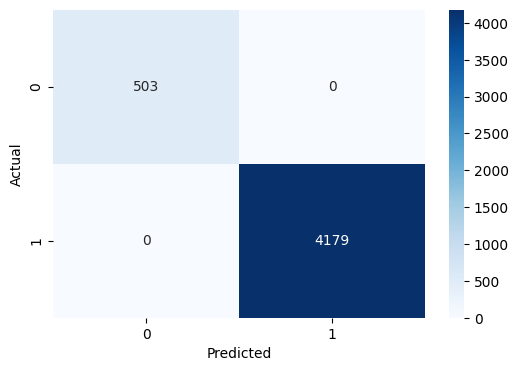

--- Decision Tree Confusion Matrix ---


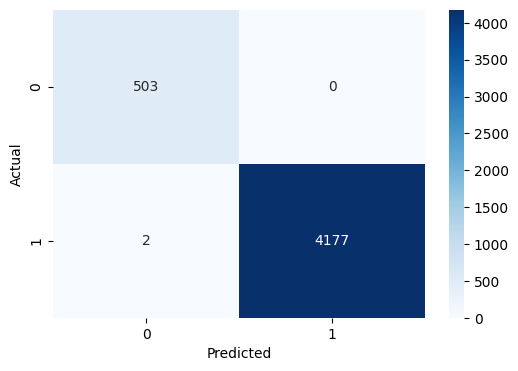

In [ ]:
plot_confusion_matrix(y_test,y_pred_log,'Logistic Regression')
plot_confusion_matrix(y_test,y_pred_dt,'Decision Tree')

### REGRESSION METRICS

In [ ]:
print(f"--- Logistic Regression ---")
print("MAE",mean_absolute_error(y_test,y_pred_log))
print("MSE",mean_squared_error(y_test,y_pred_log))
print("R2",r2_score(y_test,y_pred_log))
print(f"--- Decision Tree ---")
print("MAE",mean_absolute_error(y_test,y_pred_dt))
print("MSE",mean_squared_error(y_test,y_pred_dt))
print("R2",r2_score(y_test,y_pred_dt))

--- Logistic Regression ---
MAE 0.0
MSE 0.0
R2 1.0
--- Decision Tree ---
MAE 0.00042716787697565144
MSE 0.00042716787697565144
R2 0.9955452734656907


In [ ]:
# Error Analysis
misclassified_log=X_test[y_test!=y_pred_log]
misclassified_dt=X_test[y_test!=y_pred_dt]

In [ ]:
#misclassified samples
print(f"--- Logistic Regression Misclassified Samples ---")
display(misclassified_log.head())
print(f"--- Decision Tree Misclassified Samples ---")
display(misclassified_dt.head())

--- Logistic Regression Misclassified Samples ---


,Latitude,Longitude,Depth,Magnitude,Root Mean Square,Month_sin,Month_cos,Hour_sin,Hour_cos,Type_Explosion,...,Source_GCMT,Source_ISCGEM,Source_ISCGEMSUP,Source_NC,Source_NN,Source_OFFICIAL,Source_PR,Source_SE,Source_US,Source_UW


--- Decision Tree Misclassified Samples ---


,Latitude,Longitude,Depth,Magnitude,Root Mean Square,Month_sin,Month_cos,Hour_sin,Hour_cos,Type_Explosion,...,Source_GCMT,Source_ISCGEM,Source_ISCGEMSUP,Source_NC,Source_NN,Source_OFFICIAL,Source_PR,Source_SE,Source_US,Source_UW
22385,2.023316,-1.517548,0.310953,0.805544,0.054965,-1.290299,0.00462,-1.325813,-0.544531,-0.179098,...,0.085001,-0.006373,-0.033026,0.180125,0.003143,0.040786,0.045876,0.105873,0.062873,0.095178
22201,1.842523,-1.552806,0.062555,-0.504186,-0.466819,0.858146,-1.31844,-0.753162,-1.249634,0.160292,...,0.154359,-0.031258,-0.221567,-0.090591,0.144745,-0.092635,-0.013729,0.002270,0.194988,-0.012088
